<a href="https://colab.research.google.com/github/Mingyang0816/DSU-Fall-2023-Application/blob/main/F1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Authenticate Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Import Dataset
path = "/content/drive/My Drive/DSU Fall 2023 Application/dsu_fall23_tech_app_dataset.csv"
f1_df = pd.read_csv(path)

In [ ]:
# Check Dataset
f1_df.head()

,Driver,Country,Has_Won_A_Championship,Total_Races,Race_Wins,Seasons,Pole_Positions,Total_Championships_Won,Race_Podiums,Decade
0,Carlo Abate,Italy,False,0.0,0.0,"1962, 1963",0.0,0.0,0.0,1960
1,George Abecassis,United Kingdom,False,2.0,0.0,"1951, 1952",0.0,0.0,0.0,1950
2,Kenny Acheson,United Kingdom,False,3.0,0.0,"1983, 1985",0.0,0.0,0.0,1980
3,Andrea de Adamich,Italy,False,30.0,0.0,"1968, 1970, 1971, 1972, 1973",0.0,0.0,0.0,1970
4,Philippe Adams,Belgium,False,2.0,0.0,1994,0.0,0.0,0.0,1990


#Question 1

###Which driver has won the most races? (NOT championships)

In [ ]:
f1_df[f1_df["Race_Wins"] == f1_df["Race_Wins"].max()]

,Driver,Country,Has_Won_A_Championship,Total_Races,Race_Wins,Seasons,Pole_Positions,Total_Championships_Won,Race_Podiums,Decade
338,Lewis Hamilton,United Kingdom,True,311.0,103.0,"2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014...",103.0,7.0,191.0,2010


#Question 2

###Which country has the most champions? How many champions?

In [ ]:
# Sum up championship wins by country
country_df = f1_df.groupby(["Country"])["Total_Championships_Won"].sum()

# Find country with most champions
country_df = country_df.sort_values(ascending = False)
country_df.head(1)

Country
United Kingdom    20.0
Name: Total_Championships_Won, dtype: float64

# Question 3

### Of all drivers who have participated in at least 5 races, who has won the highest proportion of races they competed in?

In [ ]:
# Find all drivers with at least 5 races
five_races_df = f1_df[f1_df["Total_Races"] >= 5]
five_races_df.head()

,Driver,Country,Has_Won_A_Championship,Total_Races,Race_Wins,Seasons,Pole_Positions,Total_Championships_Won,Race_Podiums,Decade
3,Andrea de Adamich,Italy,False,30.0,0.0,"1968, 1970, 1971, 1972, 1973",0.0,0.0,0.0,1970
7,Fred Agabashian,United States,False,8.0,0.0,"1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957",1.0,0.0,0.0,1950
10,Christijan Albers,Netherlands,False,46.0,0.0,"2005, 2006, 2007",0.0,0.0,0.0,2010
11,Alexander Albon,Thailand,False,60.0,0.0,"2019, 2020, 2022",0.0,0.0,2.0,2020
12,Michele Alboreto,Italy,False,194.0,5.0,"1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988...",2.0,0.0,23.0,1990


In [ ]:
# Create column for proportion of races won
five_races_df["Win_Rate"] = five_races_df["Race_Wins"] / five_races_df["Total_Races"]

# Find driver with highest win proportion
five_races_df[five_races_df["Win_Rate"] == five_races_df["Win_Rate"].max()]

<ipython-input-41-988a88858578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_races_df["Win_Rate"] = five_races_df["Race_Wins"] / five_races_df["Total_Races"]


,Driver,Country,Has_Won_A_Championship,Total_Races,Race_Wins,Seasons,Pole_Positions,Total_Championships_Won,Race_Podiums,Decade,Win_Rate
238,Juan Manuel Fangio,Argentina,True,51.0,24.0,"1950, 1951, 1953, 1954, 1955, 1956, 1957, 1958",29.0,5.0,35.0,1950,0.470588


#Question 4

###Which driver(s) participated in the most seasons? How many seasons did they participate in?

In [ ]:
# Create new column for number of seasons participated
f1_df["Total_Seasons"] = f1_df["Seasons"].str.split(',').str.len()

# Sort drivers based on seasons participated
most_seasons_df = f1_df.sort_values("Total_Seasons", ascending = False)

# Find drivers who participated in most seasons
most_seasons_df.head(20)

,Driver,Country,Has_Won_A_Championship,Total_Races,Race_Wins,Seasons,Pole_Positions,Total_Championships_Won,Race_Podiums,Decade,Total_Seasons
54,Rubens Barrichello,Brazil,False,322.0,11.0,"1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000...",14.0,0.0,68.0,2000,19
635,Kimi Räikkönen,Finland,True,349.0,21.0,"2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008...",18.0,1.0,103.0,2010,19
710,Michael Schumacher,Germany,True,306.0,91.0,"1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998...",68.0,7.0,155.0,2000,19
17,Fernando Alonso,Spain,True,356.0,32.0,"2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009...",22.0,2.0,99.0,2010,19
364,Graham Hill,United Kingdom,True,176.0,14.0,"1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965...",13.0,2.0,36.0,1970,18
135,Jenson Button,United Kingdom,True,306.0,15.0,"2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007...",8.0,1.0,50.0,2010,18
590,Riccardo Patrese,Italy,False,256.0,6.0,"1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984...",8.0,0.0,37.0,1980,17
95,Jo Bonnier,Sweden,False,104.0,1.0,"1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963...",1.0,0.0,1.0,1960,16
107,Jack Brabham,Australia,True,126.0,14.0,"1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962...",13.0,3.0,31.0,1960,16
338,Lewis Hamilton,United Kingdom,True,311.0,103.0,"2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014...",103.0,7.0,191.0,2010,16


#Challenge Question 1

###Your friend claims that F1 races are boring because the racer who starts in first (the racer with the pole position) usually wins the race.

###First, explain whether our dataset is suitable to properly verify this claim.

###Then, examine the relation between the frequency of a driver being in pole position and them winning their races (even if you believe the data is not suitable).

###Finally, based on all of the evidence, tell us what you would say to your friend.

**Suitability of Dataset**

This dataset is not suitable to properly verify this claim. Although statistics of the number of pole positions and the number of race wins of each F1 driver are provided, we do not know whether the pole position and race win happened during the same race. For instance, Alonso has 22 pole positions and 32 race wins. One possibility could be that all his 22 pole positions led to race wins, from which we can infer that the driver who starts in first usually wins the race. On the other hand, another possibility could be that the 32 race wins occurred in different races, not in the 22 races he got pole position in. In that case, we can infer that there is minimal correlation between a driver starting in pole position and them winning the race. In conclusion, since this dataset did not specify if the pole positions and race wins occurred during the same race, it is not suitable to verify this claim. We will need a dataset of all F1 races that specifies the driver that attained pole position and the driver that won for each race.

**Relation between pole position and race win**

In [ ]:
# Retrieve drivers who participated in at least 1 race
pole_win_df = f1_df[f1_df["Total_Races"] >= 1]

# Calculate frequency of pole positions
pole_win_df["Pole_Frequency"] = pole_win_df["Pole_Positions"] / pole_win_df["Total_Races"]
pole_win_df['Pole_Frequency'] = pole_win_df['Pole_Frequency'].apply(lambda x: float("{:.4f}".format(x)))

# Calculate frequency of race wins
pole_win_df["Win_Frequency"] = pole_win_df["Race_Wins"] / pole_win_df["Total_Races"]
pole_win_df['Win_Frequency'] = pole_win_df['Win_Frequency'].apply(lambda x: float("{:.4f}".format(x)))

<ipython-input-51-a4f4a33730ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pole_win_df["Pole_Frequency"] = pole_win_df["Pole_Positions"] / pole_win_df["Total_Races"]
<ipython-input-51-a4f4a33730ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pole_win_df['Pole_Frequency'] = pole_win_df['Pole_Frequency'].apply(lambda x: float("{:.4f}".format(x)))
<ipython-input-51-a4f4a33730ab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

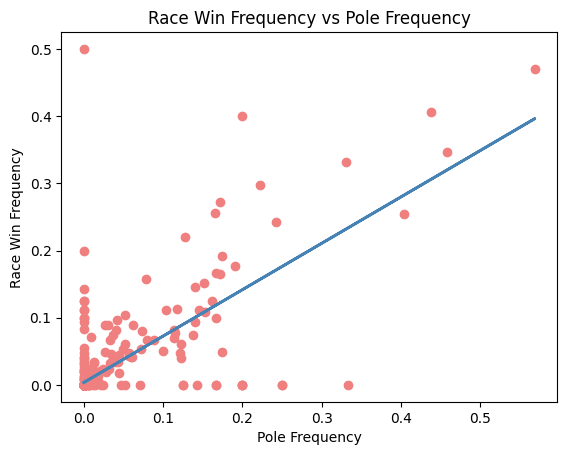

In [ ]:
# Scatterplot of Race Win Frequency vs Pole Frequency
x = pole_win_df["Pole_Frequency"]
y = pole_win_df["Win_Frequency"]
plt.scatter(x, y, color = "lightcoral")

# Plot best fit line
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, color='steelblue', linewidth=2)
plt.xlabel("Pole Frequency")
plt.ylabel("Race Win Frequency")
plt.title("Race Win Frequency vs Pole Frequency")
plt.show()

In [ ]:
# Correlation between Pole Frequency and Race Win Frequency
print(pole_win_df["Pole_Frequency"].corr(pole_win_df["Win_Frequency"]))

0.724665778381764


**Conclusion of Analysis**

Based on the scatterplot and best fit line, we observe that there is a positive relationship between the frequency of pole positions and the frequency of race wins for F1 drivers. Furthermore, the correlation coefficient is 0.72, which is positive and relatively close to 1. Therefore, we can conclude that there is a relatively strong positive correlation between the frequency of pole positions and the frequency of race wins for F1 drivers.

However, correlation does not imply causation, so we cannot conclude that starting from pole position leads to a driver winning the race. Furthermore, as explained earlier, we are unable to verify the claim that the driver who starts first will usually win the race since the dataset did not specify if the drivers achieved pole positions and race wins in the same or different races.

In fact, for a more rigorous verification of the claim that the driver who starts first usually wins the race requires us to carry out a hypothesis test. The null hypothesis is that the proportion of Formula 1 drivers winning the race when in pole position is 50% or less. The alternative hypothesis is that the proportion of Formula 1 drivers winning the race when in pole position is greater than 50%. Nonetheless, this will require a dataset of all F1 races that specifies the driver that attained pole position and the driver that won for each race.

#Challenge Question 2

Make an argument for which decade was the most competitive decade of F1 Racing. Justify your position AND state any drawbacks or considerations to be made of your analysis.

Note: A highly competitive decade would be one in which there are no drivers who are frequently winning or dominating their opponents. Try to incorporate information stemming from "Race_Wins", "Race_Podiums", or "Total_Championships_Won" in your response if possible.

**Unique Drivers with Race Wins by Decade**

In [ ]:
# Retrieve drivers with at least one race win
win_df = f1_df[f1_df["Race_Wins"] >= 1]

# Find number of drivers with at least one race win by decade
win_df = win_df.groupby(["Decade"])["Driver"].nunique()

# Sort in descending order
win_df_descending = win_df.sort_values(ascending = False)
win_df_descending

Decade
1980    23
1960    20
1970    15
2000    14
1950    13
2010    11
2020     9
1990     8
Name: Driver, dtype: int64

Text(0.5, 1.0, 'Number of Drivers with Race Wins by Decade')

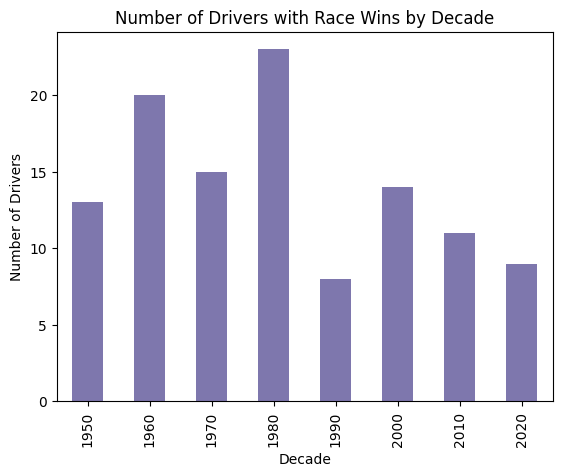

In [ ]:
ax = win_df.plot.bar(color = "darkslateblue", alpha = 0.7)
ax.set_xlabel("Decade")
ax.set_ylabel("Number of Drivers")
ax.set_title("Number of Drivers with Race Wins by Decade")

**Unique Drivers with Podium Wins by Decade**

In [ ]:
# Retrieve drivers with at least one podium
podium_df = f1_df[f1_df["Race_Podiums"] >= 1]

# Find number of drivers with at least one podium by decade
podium_df = podium_df.groupby(["Decade"])["Driver"].nunique()

# Sort in descending order
podium_df_descending = podium_df.sort_values(ascending = False)
podium_df_descending

Decade
1960    48
1950    33
1970    30
1980    29
1990    24
2000    18
2010    18
2020    15
Name: Driver, dtype: int64

Text(0.5, 1.0, 'Number of Drivers with Podium Wins by Decade')

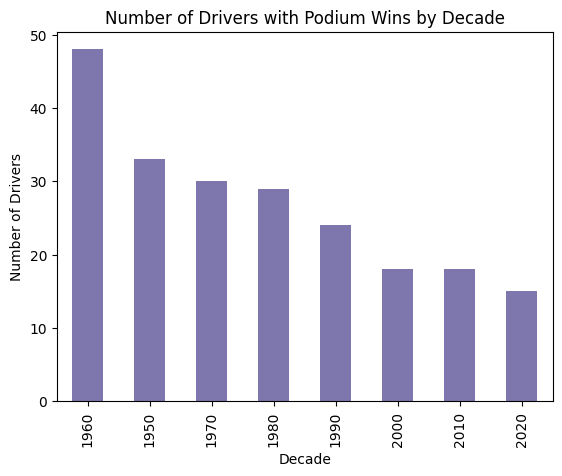

In [ ]:
ax = podium_df.plot.bar(color = "darkslateblue", alpha = 0.7)
ax.set_xlabel("Decade")
ax.set_ylabel("Number of Drivers")
ax.set_title("Number of Drivers with Podium Wins by Decade")

**Unique Drivers with Championship Wins by Decade**

In [ ]:
# Retrieve drivers with at least one championship
championship_df = f1_df[f1_df["Total_Championships_Won"] >= 1]

# Find number of drivers with at least one championship by decade
championship_df = championship_df.groupby(["Decade"])["Driver"].nunique()

# Sort in descending order
championship_df_descending = championship_df.sort_values(ascending = False)
championship_df_descending

Decade
1980    8
2010    6
1970    5
1960    4
2000    4
1950    3
1990    3
2020    1
Name: Driver, dtype: int64

Text(0.5, 1.0, 'Number of Drivers with Championship Wins by Decade')

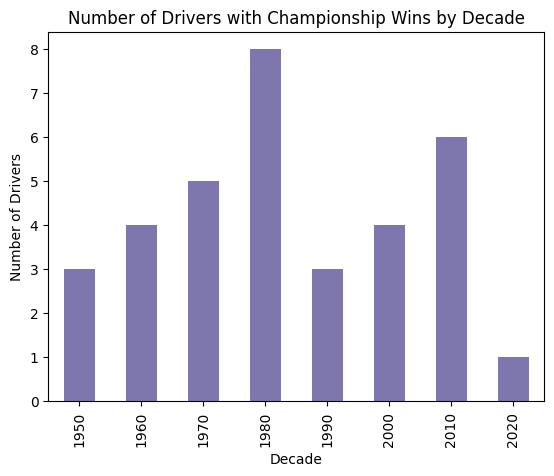

In [ ]:
ax = championship_df.plot.bar(color = "darkslateblue", alpha = 0.7)
ax.set_xlabel("Decade")
ax.set_ylabel("Number of Drivers")
ax.set_title("Number of Drivers with Championship Wins by Decade")

**Conclusion**

1980s is the most competitive decade in F1 racing. As seen from the bar plots (refer to the Jupyter Notebook attached), 1980s is the decade with the most number of unique drivers for race wins and championship wins, and a decent number of unique drivers for podium wins. However, my analysis has the following limitations:

1. Some drivers won their championships/races/podiums in seasons that are not part of the decade they are classified under. For instance, Fernando Alonso won his F1 championships in 2005 and 2006, but he has been classified under the 2010s decade during which he failed to win any championships, thus leading to inaccuracies in my analysis.

2. F1 has been constantly expanding the number of races per season. Since there were fewer races back in the 1950s as compared to the 2010s, there would most likely be fewer unique championship/race/podium winners. By this logic, the competitiveness of F1 in earlier decades has been underrated in my analysis, whereas the competitiveness of F1 in later decades has been inflated. Therefore, I have to take into account of the total number of races per season in my analysis for a fair comparison of competitiveness between decades, such as dividing by the number of races in each season.

3. Since there are 2 drivers per team in F1, we have to take into account of the team that championship/race/podium winners belong to. For instance, a decade with 4 championship winners from 2 teams is not as competitive as a decade with 4 championship winners from 4 different teams.